# import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json


In [3]:
%matplotlib inline

In [13]:
#import US JSON
country_geo= r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics\02 Data\Original Data\us_states.json'

In [14]:
country_geo

'C:\\Users\\Admin\\Documents\\CF Tasks\\Last Python Advanced Analytics\\02 Data\\Original Data\\us_states.json'

In [101]:
#import city json
city_geo= r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics\02 Data\Original Data\New York.geo.json'

In [105]:
#zip codes
city_geo_2= r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics\02 Data\Original Data\nyc-zip-code-tabulation-areas-polygons.geojson'

In [15]:
#import csv
#folder shortcut
path = r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics'

In [16]:
citi = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_citi_61.csv'))

In [17]:
citi.head()

Unnamed: 0 trip_id weekday  start_hour  start_station_id  \
0           0  LnQzQk     Mon          18               523   
1           1  IL9boN     Thu          18               257   
2           2  46clGB     Wed          19               479   
3           3  v7vdFt     Sat          11               527   
4           5  HbKJBz     Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [19]:
station_counts = citi.groupby('start_station_id')['start_of_ride'].count().reset_index()

In [20]:
#how many rides occured at that station
station_counts

start_station_id  start_of_ride
0                  72            158
1                  79            122
2                  82             59
3                  83             72
4                 116            269
..                ...            ...
325              2017             90
326              2021            150
327              2022             96
328              2023             74
329              3002            203

[330 rows x 2 columns]

In [22]:
station_counts_day = citi.groupby(['start_station_id', 'weekday'])['start_of_ride'].count()


In [23]:
station_counts_day

start_station_id  weekday
72                Fri        31
                  Mon        23
                  Sat        23
                  Sun        25
                  Thu        21
                             ..
3002              Sat        37
                  Sun        39
                  Thu        20
                  Tue        26
                  Wed        31
Name: start_of_ride, Length: 2276, dtype: int64

In [24]:
station_counts_day.head(20)

start_station_id  weekday
72                Fri        31
                  Mon        23
                  Sat        23
                  Sun        25
                  Thu        21
                  Tue        16
                  Wed        19
79                Fri        22
                  Mon        15
                  Sat        13
                  Sun        11
                  Thu        24
                  Tue        16
                  Wed        21
82                Fri         6
                  Mon        12
                  Sat         6
                  Sun        11
                  Thu         6
                  Tue         8
Name: start_of_ride, dtype: int64

In [25]:
station_counts.head(50)

start_station_id  start_of_ride
0                 72            158
1                 79            122
2                 82             59
3                 83             72
4                116            269
5                119              7
6                120             25
7                127            253
8                128            264
9                137             76
10               143             48
11               144             13
12               146            113
13               147            235
14               150             89
15               151            294
16               152            129
17               153            186
18               157             68
19               160            117
20               161            199
21               164            123
22               167            180
23               168            257
24               173            157
25               174            117
26               195            158
27               212            144
28               216             36
29               217             51
30               218             25
31               223            186
32               224             98
33               225             89
34               228            126
35               229            154
36               232             30
37               233             94
38               236            172
39               237            205
40               238            121
41               239             53
42               241             40
43               242             22
44               243             88
45               244             39
46               245             19
47               247            121
48               248             36
49               249             79

In [26]:
station_counts.max()

start_station_id    3002
start_of_ride        475
dtype: int64

In [27]:
station_counts.min()

start_station_id    72
start_of_ride        3
dtype: int64

In [28]:
station_counts.mean()

start_station_id    447.809091
start_of_ride       130.281818
dtype: float64

<Axes: ylabel='Count'>

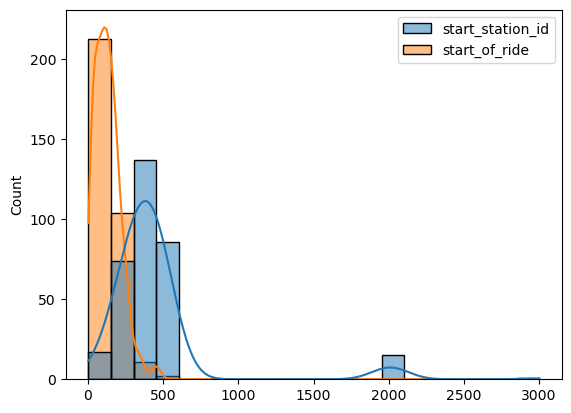

In [29]:
#looking into station counts
sns.histplot(station_counts, bins=20, kde = True)  

<Axes: ylabel='Count'>

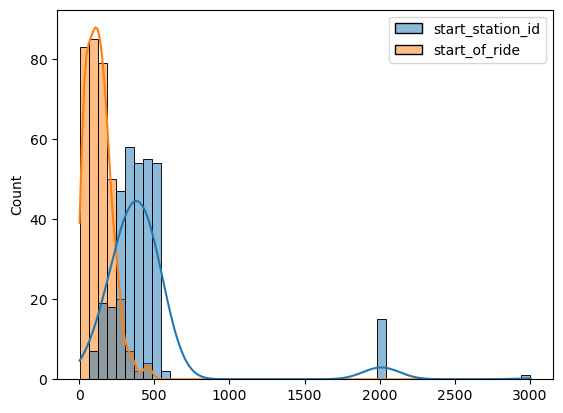

In [30]:
#looking into station counts
sns.histplot(station_counts, bins=50, kde = True) 

In [33]:
# select only needed columns
columns = ["weekday","start_hour","start_station_id","start_station_longitude","start_station_latitude","start_of_ride"]

In [34]:
citi_1 = citi[columns]

In [35]:
citi_1.head()

weekday  start_hour  start_station_id  start_station_longitude  \
0     Mon          18               523               -73.991382   
1     Thu          18               257               -74.002472   
2     Wed          19               479               -73.991255   
3     Sat          11               527               -73.974347   
4     Fri          22               293               -73.990765   

   start_station_latitude        start_of_ride  
0               40.754666  2013-09-09 18:18:55  
1               40.719392  2013-09-12 18:38:53  
2               40.760193  2013-09-18 19:44:04  
3               40.743156  2013-09-28 11:54:37  
4               40.730287  2013-09-27 22:01:01

In [36]:
type(citi_1)

pandas.core.frame.DataFrame

In [37]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weekday                  42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_longitude  42993 non-null  float64
 4   start_station_latitude   42993 non-null  float64
 5   start_of_ride            42993 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [38]:
# Check for missing values

citi_1.isnull().sum()

weekday                    0
start_hour                 0
start_station_id           0
start_station_longitude    0
start_station_latitude     0
start_of_ride              0
dtype: int64

In [39]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [45]:
file_path = os.path.join(path, '02 Data','prepared data','cleaned_citi_61.csv')

In [46]:
parse_dates = ['start_of_ride']


In [47]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [48]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   trip_id                  42993 non-null  object        
 2   weekday                  42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_station_id         42993 non-null  int64         
 5   start_station_name       42993 non-null  object        
 6   start_station_latitude   42993 non-null  float64       
 7   start_station_longitude  42993 non-null  float64       
 8   end_station_id           42993 non-null  int64         
 9   end_station_name         42993 non-null  object        
 10  end_station_latitude     42993 non-null  float64       
 11  end_station_longitude    42993 non-null  float64       
 12  trip_duration            42993 n

In [49]:
# Calculate rides per day for each station
station_daily_counts = citi.groupby(['start_station_id', citi['start_of_ride'].dt.date])['start_of_ride'].count()

In [50]:
#rides taken each day at each station
station_daily_counts

start_station_id  start_of_ride
72                2013-09-02        3
                  2013-09-03        1
                  2013-09-04        4
                  2013-09-05        8
                  2013-09-06       10
                                   ..
3002              2013-09-26        9
                  2013-09-27        7
                  2013-09-28       12
                  2013-09-29        6
                  2013-09-30        3
Name: start_of_ride, Length: 8667, dtype: int64

In [51]:
station_daily_counts.head(35)

start_station_id  start_of_ride
72                2013-09-02        3
                  2013-09-03        1
                  2013-09-04        4
                  2013-09-05        8
                  2013-09-06       10
                  2013-09-07        6
                  2013-09-08        7
                  2013-09-09        5
                  2013-09-10        7
                  2013-09-11        7
                  2013-09-12        7
                  2013-09-13        7
                  2013-09-14        7
                  2013-09-15        8
                  2013-09-16        4
                  2013-09-17        4
                  2013-09-19        1
                  2013-09-20        6
                  2013-09-21        5
                  2013-09-22        5
                  2013-09-23        6
                  2013-09-24        4
                  2013-09-25        8
                  2013-09-26        5
                  2013-09-27        8
                  

In [52]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()


In [53]:
#checking code
station_avg_rides_per_day

start_station_id  start_of_ride
0                  72       5.642857
1                  79       4.357143
2                  82       2.185185
3                  83       2.571429
4                 116       8.966667
..                ...            ...
325              2017       3.000000
326              2021       5.357143
327              2022       3.310345
328              2023       3.217391
329              3002       6.766667

[330 rows x 2 columns]

In [54]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'start_of_ride':'average_daily_rides'})

In [55]:
#merging data sets
citi_1.head()

weekday  start_hour  start_station_id  start_station_longitude  \
0     Mon          18               523               -73.991382   
1     Thu          18               257               -74.002472   
2     Wed          19               479               -73.991255   
3     Sat          11               527               -73.974347   
4     Fri          22               293               -73.990765   

   start_station_latitude        start_of_ride  
0               40.754666  2013-09-09 18:18:55  
1               40.719392  2013-09-12 18:38:53  
2               40.760193  2013-09-18 19:44:04  
3               40.743156  2013-09-28 11:54:37  
4               40.730287  2013-09-27 22:01:01

In [56]:
station_avg_rides_per_day.head()

start_station_id  average_daily_rides
0                72             5.642857
1                79             4.357143
2                82             2.185185
3                83             2.571429
4               116             8.966667

In [57]:
station_avg_rides_per_day.shape

(330, 2)

In [58]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)


In [59]:
# lat and long for each station
station_loc = citi.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()

In [60]:
station_loc

start_station_latitude  start_station_longitude
start_station_id                                                 
72                             40.767272               -73.993929
79                             40.719116               -74.006667
82                             40.711174               -74.000165
83                             40.683826               -73.976323
116                            40.741776               -74.001497
...                                  ...                      ...
2017                           40.750224               -73.971214
2021                           40.759291               -73.988597
2022                           40.758491               -73.959206
2023                           40.759681               -73.970314
3002                           40.711512               -74.015756

[330 rows x 2 columns]

In [61]:
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [62]:
df_merged

start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
1                  79               40.719116               -74.006667   
2                  82               40.711174               -74.000165   
3                  83               40.683826               -73.976323   
4                 116               40.741776               -74.001497   
..                ...                     ...                      ...   
325              2017               40.750224               -73.971214   
326              2021               40.759291               -73.988597   
327              2022               40.758491               -73.959206   
328              2023               40.759681               -73.970314   
329              3002               40.711512               -74.015756   

     average_daily_rides  
0               5.642857  
1               4.357143  
2               2.185185  
3               2.571429  
4               8.966667  
..                   ...  
325             3.000000  
326             5.357143  
327             3.310345  
328             3.217391  
329             6.766667  

[330 rows x 4 columns]

In [63]:
data_to_plot = df_merged[['start_station_id','average_daily_rides',]]
data_to_plot.head()

start_station_id  average_daily_rides
0                72             5.642857
1                79             4.357143
2                82             2.185185
3                83             2.571429
4               116             8.966667

In [64]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

start_station_longitude  start_station_latitude  average_daily_rides
0               -73.993929               40.767272             5.642857
1               -74.006667               40.719116             4.357143
2               -74.000165               40.711174             2.185185
3               -73.976323               40.683826             2.571429
4               -74.001497               40.741776             8.966667

In [65]:
df_merged['average_daily_rides'].max()

15.833333333333334

In [66]:
df_merged['average_daily_rides'].mean()

4.609605418741775

<Axes: xlabel='average_daily_rides', ylabel='Count'>

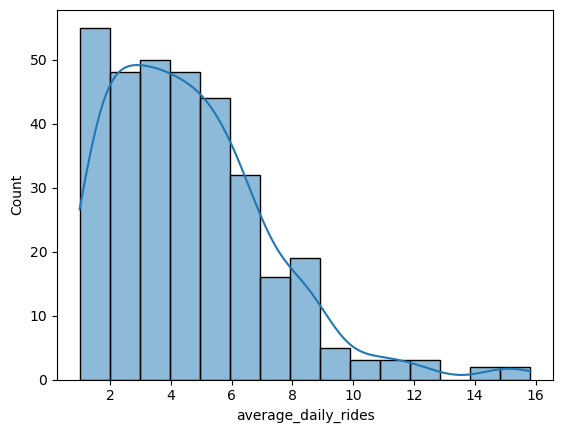

In [67]:
sns.histplot(df_merged['average_daily_rides'], bins=15, kde = True)

In [68]:
nyc_map

In [71]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [77]:
start_station_id.forEach(station => {
  var marker = new mapboxgl.Marker()
    .setLngLat(start_station_longitude.longitude, start_station_latitude.latitude)
    .addTo(nyc_map);
    });

SyntaxError: invalid syntax (2201406825.py, line 1)

In [78]:
data_to_plot_1.head()

start_station_longitude  start_station_latitude  average_daily_rides
0               -73.993929               40.767272             5.642857
1               -74.006667               40.719116             4.357143
2               -74.000165               40.711174             2.185185
3               -73.976323               40.683826             2.571429
4               -74.001497               40.741776             8.966667

In [79]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [80]:
data_to_plot_2.head()

start_station_longitude  start_station_latitude
0               -73.993929               40.767272
1               -74.006667               40.719116
2               -74.000165               40.711174
3               -73.976323               40.683826
4               -74.001497               40.741776

In [81]:
import folium
from folium.plugins import MarkerCluster


In [82]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [106]:
choropleth_layer = folium.Choropleth(
    geo_data=city_geo_2,
    name="Choropleth Map"
).add_to(map_zip)

In [107]:
folium.LayerControl().add_to(map_zip)

In [108]:
map_zip

In [110]:
df_merged

start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
1                  79               40.719116               -74.006667   
2                  82               40.711174               -74.000165   
3                  83               40.683826               -73.976323   
4                 116               40.741776               -74.001497   
..                ...                     ...                      ...   
325              2017               40.750224               -73.971214   
326              2021               40.759291               -73.988597   
327              2022               40.758491               -73.959206   
328              2023               40.759681               -73.970314   
329              3002               40.711512               -74.015756   

     average_daily_rides  
0               5.642857  
1               4.357143  
2               2.185185  
3               2.571429  
4               8.966667  
..                   ...  
325             3.000000  
326             5.357143  
327             3.310345  
328             3.217391  
329             6.766667  

[330 rows x 4 columns]

In [111]:
df_merged.to_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'))

In [112]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="lightgreen", icon="bicycle")
    ).add_to(map_zip)








In [113]:

# Add a layer control
folium.LayerControl().add_to(map_zip)

In [114]:
map_zip

In [115]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [118]:
area_geojson = r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics\02 Data\Original Data\nyc-zip-code-tabulation-areas-polygons.geojson'

In [119]:
geojson_gdf = gpd.read_file(area_geojson)

In [120]:
# Convert bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_merged["start_station_longitude"], df_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs=geojson_gdf.crs)

In [121]:
merged_gdf = gpd.sjoin(bike_stations_gdf, geojson_gdf, predicate="within")

In [122]:
merged_gdf

start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
24                173               40.760647               -73.984427   
75                281               40.764397               -73.973715   
138               352               40.763406               -73.977225   
202               422               40.770513               -73.988038   
..                ...                     ...                      ...   
326              2021               40.759291               -73.988597   
273               499               40.769155               -73.981918   
309               538               40.757952               -73.977876   
320              2006               40.765909               -73.976342   
329              3002               40.711512               -74.015756   

     average_daily_rides                    geometry  index_right  OBJECTID  \
0               5.642857  POINT (-73.99393 40.76727)          203       204   
24              5.233333  POINT (-73.98443 40.76065)          203       204   
75              5.300000  POINT (-73.97371 40.76440)          203       204   
138             5.500000  POINT (-73.97722 40.76341)          203       204   
202             4.620690  POINT (-73.98804 40.77051)          203       204   
..                   ...                         ...          ...       ...   
326             5.357143  POINT (-73.98860 40.75929)          105       106   
273             9.100000  POINT (-73.98192 40.76916)           89        90   
309             2.965517  POINT (-73.97788 40.75795)          110       111   
320             4.482759  POINT (-73.97634 40.76591)           82        83   
329             6.766667  POINT (-74.01576 40.71151)          260       261   

    postalCode       PO_NAME STATE    borough ST_FIPS CTY_FIPS  \
0        10019      New York    NY  Manhattan      36      061   
24       10019      New York    NY  Manhattan      36      061   
75       10019      New York    NY  Manhattan      36      061   
138      10019      New York    NY  Manhattan      36      061   
202      10019      New York    NY  Manhattan      36      061   
..         ...           ...   ...        ...     ...      ...   
326      10036      New York    NY  Manhattan      36      061   
273      10023      New York    NY  Manhattan      36      061   
309      10020      New York    NY  Manhattan      36      061   
320      00083  Central Park    NY  Manhattan      36      061   
329      10281      New York    NY  Manhattan      36      061   

     BLDGpostalCode    Shape_Leng    Shape_Area  \
0                 0  24983.441628  1.882838e+07   
24                0  24983.441628  1.882838e+07   
75                0  24983.441628  1.882838e+07   
138               0  24983.441628  1.882838e+07   
202               0  24983.441628  1.882838e+07   
..              ...           ...           ...   
326               0  16418.606668  1.139511e+07   
273               0  22471.385989  1.521271e+07   
309               0   3612.203611  6.972970e+05   
320               0  32710.772800  3.830099e+07   
329               0   4717.025266  9.580872e+05   

                                                   @id  
0    http://nyc.pediacities.com/Resource/PostalCode...  
24   http://nyc.pediacities.com/Resource/PostalCode...  
75   http://nyc.pediacities.com/Resource/PostalCode...  
138  http://nyc.pediacities.com/Resource/PostalCode...  
202  http://nyc.pediacities.com/Resource/PostalCode...  
..                                                 ...  
326  http://nyc.pediacities.com/Resource/PostalCode...  
273  http://nyc.pediacities.com/Resource/PostalCode...  
309  http://nyc.pediacities.com/Resource/PostalCode...  
320  http://nyc.pediacities.com/Resource/PostalCode...  
329  http://nyc.pediacities.com/Resource/PostalCode...  

[330 rows x 17 columns]

In [123]:
merged_gdf_1=merged_gdf.drop(columns=["geometry","index_right","OBJECTID","PO_NAME","STATE","borough","ST_FIPS","CTY_FIPS","BLDGpostalCode","Shape_Leng","Shape_Area","@id"])

In [124]:
merged_gdf_1

start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
24                173               40.760647               -73.984427   
75                281               40.764397               -73.973715   
138               352               40.763406               -73.977225   
202               422               40.770513               -73.988038   
..                ...                     ...                      ...   
326              2021               40.759291               -73.988597   
273               499               40.769155               -73.981918   
309               538               40.757952               -73.977876   
320              2006               40.765909               -73.976342   
329              3002               40.711512               -74.015756   

     average_daily_rides postalCode  
0               5.642857      10019  
24              5.233333      10019  
75              5.300000      10019  
138             5.500000      10019  
202             4.620690      10019  
..                   ...        ...  
326             5.357143      10036  
273             9.100000      10023  
309             2.965517      10020  
320             4.482759      00083  
329             6.766667      10281  

[330 rows x 5 columns]

In [125]:
nyc_map

In [126]:
choropleth_layer = folium.Choropleth(
    geo_data=area_geojson,
    data=merged_gdf_1,
    columns=["postalCode", "average_daily_rides"],
    key_on="feature.properties.postalCode",  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Daily Use"
).add_to(nyc_map)

In [127]:
nyc_map

In [140]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="green", icon="bicycle")
    ).add_to(nyc_map)

In [1]:
nyc_map

NameError: name 'nyc_map' is not defined

In [130]:
nyc_map.save('plot_data.html')

In [131]:
citi.head()

Unnamed: 0 trip_id weekday  start_hour  start_station_id  \
0           0  LnQzQk     Mon          18               523   
1           1  IL9boN     Thu          18               257   
2           2  46clGB     Wed          19               479   
3           3  v7vdFt     Sat          11               527   
4           5  HbKJBz     Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

        start_of_ride          end_of_ride  
0 2013-09-09 18:18:55  2013-09-09 18:35:28  
1 2013-09-12 18:38:53  2013-09-12 18:48:34  
2 2013-09-18 19:44:04  2013-09-18 19:50:05  
3 2013-09-28 11:54:37  2013-09-28 12:03:58  
4 2013-09-27 22:01:01  2013-09-27 22:08:08

In [135]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'))

In [136]:
merged_gdf_1.head()

start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
24                173               40.760647               -73.984427   
75                281               40.764397               -73.973715   
138               352               40.763406               -73.977225   
202               422               40.770513               -73.988038   

     average_daily_rides postalCode  
0               5.642857      10019  
24              5.233333      10019  
75              5.300000      10019  
138             5.500000      10019  
202             4.620690      10019

In [137]:
merged_gdf_1.to_csv(os.path.join(path, '02 Data','prepared data', 'postalcodes'))

# From knowing what stations have the busiest average daily rides I think put it into zip codes to know what zip codes have the busiest and least busy daily action.